# 経済データの季節調整
総務省統計局の公開している「[家計調査（家計収支編）　時系列データ（二人以上の世帯）](https://www.stat.go.jp/data/kakei/longtime/index.html)」のデータを分析します。

参考文献：[経済産業省 鉱工業指数(生産・出荷・在庫、生産能力・稼働率)、製造工業生産予測指数 季節調整手法](https://www.meti.go.jp/statistics/tyo/iip/riyou-4.pdf)

## データの前処理
配布されているデータには空白のセルや複数にまたがるセルが含まれていて、このまま処理するのは難しいです。
必要な範囲だけを切り取り数値に変換した `new_df` を用意します。

In [1]:
import pandas as pd

df = pd.read_csv("./支出金額.csv", encoding="cp932")
df.head(15)

,二人以上の世帯_支出金額[円],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,1,2,3,4,...,260,261,262,263,264,265,266,267,268,269
0,NaN,NaN,NaN,NaN,NaN,NaN,2000年,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2022年,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,(平成12年),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,(令和4年),NaN,NaN,NaN,NaN
2,表側連番,階層,大分類,中分類,小分類,品目分類,1月,2月,3月,4月,...,8月,9月,10月,11月,12月,1月,2月,3月,4月,5月
3,1,-,-,-,-,世帯数分布(抽出率調整),10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,2,-,-,-,-,集計世帯数,7887,7942,7934,7922,...,7397,7378,7407,7411,7416,7353,7315,7369,7357,7391
5,3,-,-,-,-,世帯人員(人),3.32,3.32,3.32,3.32,...,2.93,2.93,2.93,2.93,2.92,2.92,2.92,2.92,2.91,2.91
6,4,-,-,-,-,18歳未満人員(人),0.74,0.75,0.75,0.75,...,0.55,0.56,0.56,0.55,0.55,0.55,0.55,0.54,0.55,0.55
7,5,-,-,-,-,65歳以上人員(人),0.52,0.53,0.53,0.52,...,0.85,0.83,0.84,0.84,0.85,0.84,0.85,0.84,0.84,0.84
8,6,-,-,-,-,うち無職者人員(人),0.41,0.41,0.41,0.41,...,0.68,0.67,0.68,0.67,0.67,0.67,0.68,0.66,0.67,0.67
9,7,-,-,-,-,有業人員(人),1.51,1.51,1.51,1.52,...,1.33,1.33,1.33,1.34,1.33,1.33,1.31,1.33,1.33,1.34


In [3]:
new_df = pd.DataFrame(
    {
        "日付": pd.date_range(start="2000/1/1", end="2022/5/1", freq="MS"),
        "消費支出": pd.to_numeric(df.iloc[13][6:]),
    }
)
new_df = new_df.set_index("日付")
new_df["消費支出"] = (new_df["消費支出"] / new_df["消費支出"].mean()) * 100.0

new_df.head(10)

,消費支出
日付,
2000-01-01,105.629546
2000-02-01,99.161881
2000-03-01,114.404119
2000-04-01,114.381944
2000-05-01,105.269625
2000-06-01,101.544867
2000-07-01,111.381122
2000-08-01,105.756457
2000-09-01,101.138548


## データをプロットしてみる

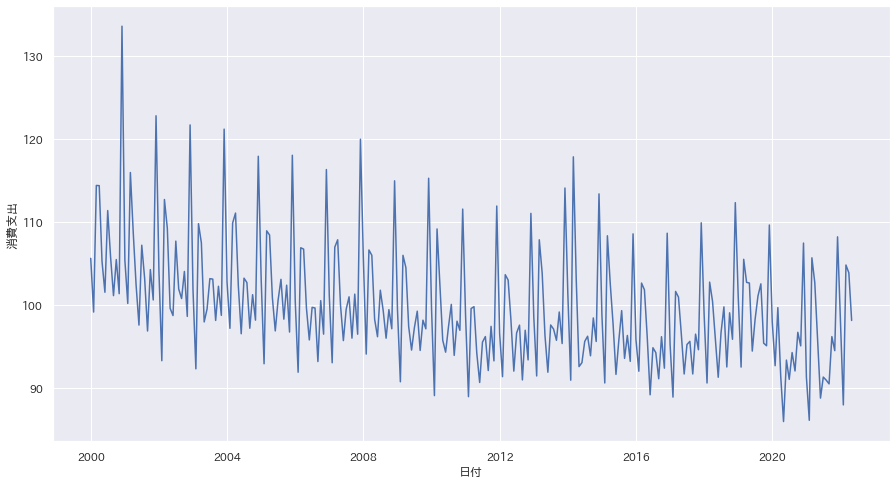

In [4]:
import japanize_matplotlib as jm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (15, 8)})
jm.japanize()
sns.lineplot(data=new_df, x="日付", y="消費支出")
plt.show()

## 傾向変動を取り除く
人口増加などの要因による長期間にわたる変動傾向。移動平均線を用いたり、最小二乗法による直線・曲線のフィッティングなど、統計データによって手法は異なる。

参考：[numpy.polyfit — NumPy v1.23 Manual](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

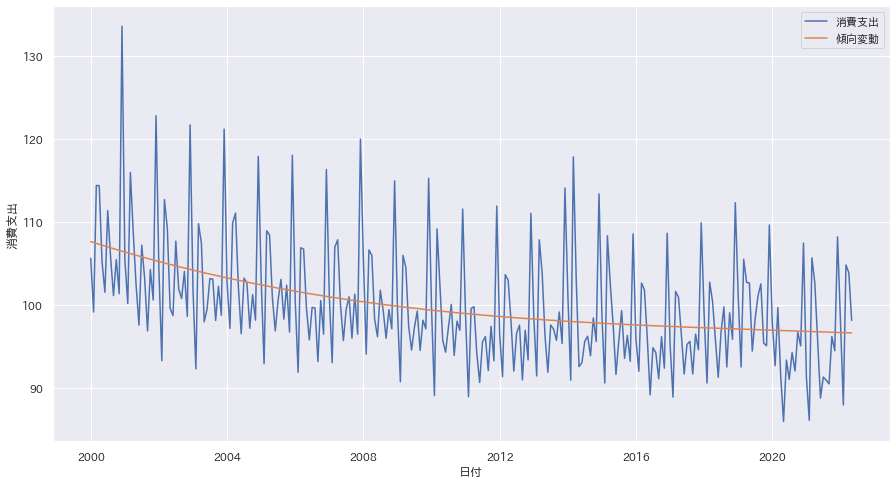

In [9]:
import numpy as np

idx = [i for i in range(new_df.shape[0])]

傾向変動の関数の係数 = np.polyfit(idx, new_df["消費支出"], 3)
傾向変動の関数 = np.poly1d(傾向変動の関数の係数)
new_df["傾向変動"] = 傾向変動の関数(idx)
new_df["傾向変動調整分"] = new_df["消費支出"] - 傾向変動の関数(idx) + np.mean(傾向変動の関数(idx))

sns.set(rc={"figure.figsize": (15, 8)})
jm.japanize()
sns.lineplot(data=new_df, x="日付", y="消費支出", label="消費支出")
sns.lineplot(data=new_df, x="日付", y="傾向変動", label="傾向変動")
# sns.lineplot(data=new_df, x="日付", y="傾向変動調整分", label="傾向変動調整分")
plt.show()

## 循環変動
[キチンサイクル](https://www.smd-am.co.jp/glossary/YST3239/)など、数年周期の変動を指すことが多い。

## 季節変動
一年を周期とした周期的な変動を総称して「季節変動」と呼ぶ。月別平均法・連環比率法など。

### ①過去の複数年の月別平均値を求める

In [11]:
new_df["月"] = new_df.index.month
季節ごとの平均値 = new_df.groupby("月").mean()["消費支出"]
季節ごとの平均値

月
1     100.083036
2      92.102619
3     107.280556
4     104.477264
5      97.832924
6      94.348753
7      98.973205
8      99.165835
9      95.138160
10     99.351828
11     96.230671
12    114.934402
Name: 消費支出, dtype: float64

### ②月別平均値の合計を求める

In [12]:
月別平均値の合計 = 季節ごとの平均値.sum()
print(f"月別平均値の合計 = {月別平均値の合計}")

月別平均値の合計 = 1199.9192545557726


### ③修正係数を計算する

In [13]:
修正係数 = 1200.0 / 月別平均値の合計
print(f"修正係数 = {修正係数}")

修正係数 = 1.0000672923981517


### ④月別平均に修正係数を乗じる

In [14]:
修正済みの季節ごとの平均値 = 修正係数 * 季節ごとの平均値

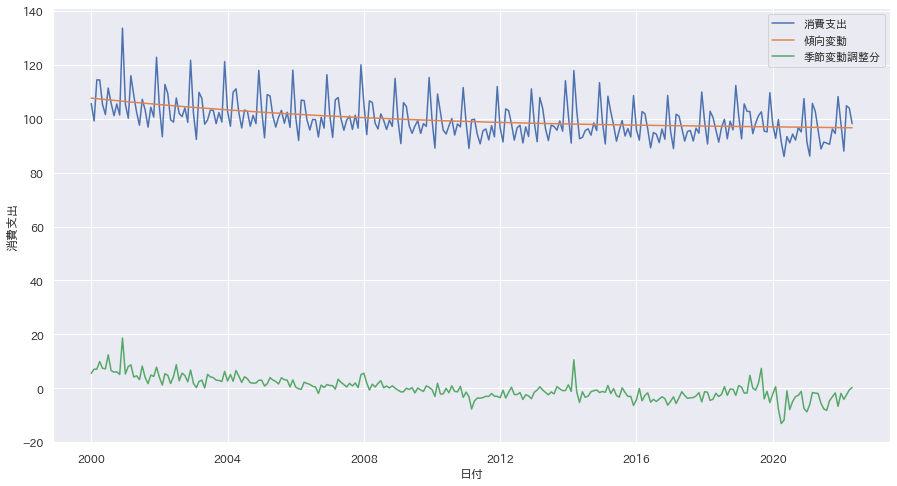

In [15]:
# 各月のデータから修正済みの季節ごとの平均値を引いています
new_df["季節変動調整分"] = new_df["消費支出"] - new_df["月"].apply(lambda m: 修正済みの季節ごとの平均値[m])
new_df.to_csv("支出金額_加工済みデータ.csv", encoding="utf-8-sig")

# グラフを作成
sns.set(rc={"figure.figsize": (15, 8)})
jm.japanize()
sns.lineplot(data=new_df, x="日付", y="消費支出", label="消費支出")
sns.lineplot(data=new_df, x="日付", y="傾向変動", label="傾向変動")
sns.lineplot(data=new_df, x="日付", y="季節変動調整分", label="季節変動調整分")
plt.show()